# Basic Linear Regression using Neural Networks

First off, using a neural network to solve a regression problem is complete overkill! BUT!!! It is a wonderful way to demonstrate how a neural network can be used to  solve an optimization problem. It also gives us an opportunity to break the algorithm down step-by-step!

Let's start by taking a look at some data prepared for us by Kaggle (https://www.kaggle.com/andonians/random-linear-regression/data).

According to Kaggle: "**This is probably the dumbest dataset on Kaggle**"

There are 700 points in the training set and 300 in the test set (following standard 70/30 rule)

In [1]:
# ----- IMPORTS ----- #
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ML
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [2]:
# Define reset function to correct the shape of vectors
def reset_sizes(*args):
    return tuple(arg.reshape((arg.shape[0], 1)) for arg in args)

/home/carterrhea/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/carterrhea/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


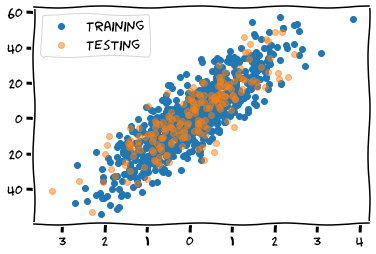

In [4]:
# And we download using our best friend, pandas read_csv (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
# Sklearn for creating a dataset
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1000, 
                             n_targets=1, random_state=42, noise=10)
dataset = {'X': X, 'y': y}

X, y = reset_sizes(X, y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# And now let us plot
with plt.xkcd():
        plt.scatter(x_train, y_train, label='Training')
        plt.scatter(x_test, y_test, label='Testing', alpha=0.5)
        plt.legend()

## Questions:
    - Does this look like a reasonable training set?
    - Is the test set well sampled?

## Using built-in linear regression models
Let's see how well the built in SKLEARN linear regression model does!

In [5]:
# Define linear regression model and normalize data
clf = LinearRegression(normalize=True)
# Train regression model
clf.fit(x_train,y_train)
# Predict test set y values
y_pred = clf.predict(x_test)
# Compare predictions with true values using mean squared error
print("The mean squared error is %.4f"%r2_score(y_test,y_pred))

The mean squared error is 0.7221


## Build our own single layer perceptron!

We are now going to built a single layer (and single node) perceptron systematically!

Keep in mind that our equation is $$y=m\cdot x+b$$

### Step 1: Initialize Weights


In [6]:
# Let's snag some values from a normal distribution
def init_params():
    m = np.random.normal()
    b = np.random.normal()
    return m, b

### Step 2: Forward Propagation

In [7]:
def forward_prop(X, m, b):
    y_pred = m * X + b
    return y_pred

### Step 3: Calculate Loss Function
We chose the mean squared error loss function
$$L = \frac{1}{2M}\sum_{i=1}^M(y_{pred}^i-y^i)^2 $$

In [8]:
def compute_loss(y, y_pred):
    loss = (1 / 2*len(y)) * np.mean((y_pred - y)**2)
    return loss

### Step 4: Backprogation
We now need to calculate the derivates of our loss function with respect to our variables (m and b)

$$\frac{\partial L}{\partial m} = \frac{1}{M}\sum_{i=1}^M(y_{pred}^i-y^i)\cdot x^i $$

$$\frac{\partial L}{\partial b} = \frac{1}{M}\sum_{i=1}^M(y_{pred}^i-y^i)\cdot $$

In [9]:
def gradient(m, b, X_train, y_train, y_pred):
    # Compute the gradients
    dm = np.mean((y_pred - y_train) * X_train)
    db = np.mean(y_pred - y_train)
    return dm, db

In [10]:
def update_params(m, b, dm, db, l_r):
    m -= l_r * dm
    b -= l_r * db
    return m, b

In [11]:
def grad_desc(X_train, y_train, y_pred, m, b, l_r):
    dm, db = gradient(m, b, X_train, y_train, y_pred)
    m, b = update_params(m, b, dm, db, l_r)
    return m, b

### Step 5: Iterate
Now that we have defined all of our steps, we need to write a code that walks through these steps! Also, we need to define the learning rate paramter :)

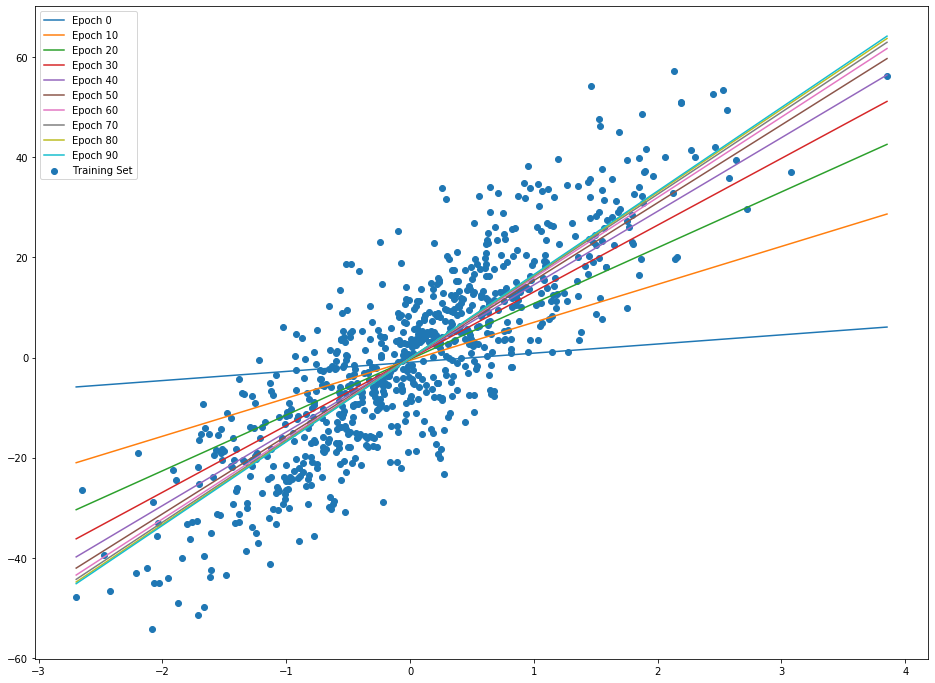

In [39]:
fig = plt.figure(figsize=(16,12))
l_r = 0.05  # Learning Rate
epochs = 100  # Number of Epochs
# Initialize
m, b = init_params()
# Keep track of losses
losses = []
# Just for plotting purposes
x_line = np.linspace(np.min(x_train), np.max(x_train), 10) 
# Step through each epoch (iteration)
plt.scatter(x_train, y_train, label='Training Set')
for i in range(epochs):
    # Forward propogation!
    y_pred = forward_prop(x_train, m, b)
    # Compute losses
    loss = compute_loss(y_train, y_pred)
    losses.append(loss)
    # Backpropagation
    m, b = grad_desc(x_train, y_train, y_pred, m, b, l_r)
    if(i%10==0):
        plt.plot(x_line, m*x_line+b, label='Epoch %i'%i)
        #plot_pred_line(x_train, y_train, m, b, losses)
plt.legend()
plt.show()

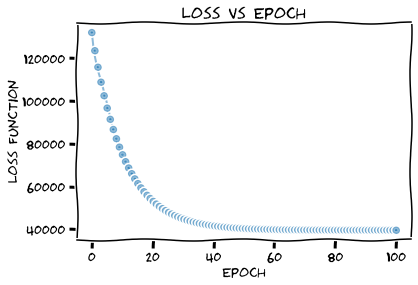

In [37]:
with plt.xkcd():
    plt.plot(np.linspace(0,100,100), losses, alpha=0.5, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Function')
    plt.title('Loss vs Epoch')